In [1]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('placed.csv')
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,cgpa,resume_score,placed
count,100.0000,100.000000,100.000000
mean,6.9422,6.930500,0.500000
std,1.1192,0.979608,0.502519
min,5.2700,4.950000,0.000000
25%,5.9800,6.190000,0.000000
50%,6.6200,7.055000,0.500000
75%,8.0450,7.640000,1.000000
max,9.4000,9.060000,1.000000


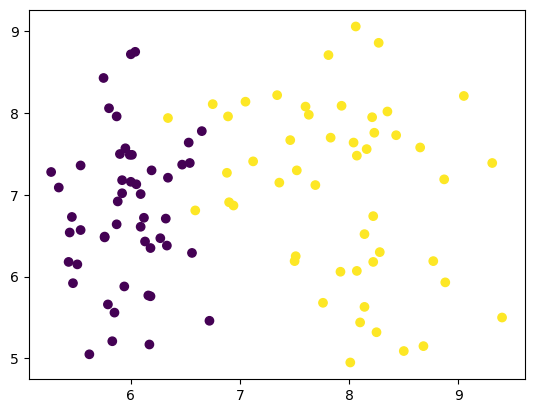

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'] , df['resume_score'] , c = df['placed'])


In [15]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.7318538 ,  0.13886047],
       [-0.78936922,  0.853     ],
       [-0.23677239,  1.38860465],
       [ 1.6973165 ,  0.22812791],
       [ 0.62666015, -0.93234884],
       [-1.27289144, -0.57527907],
       [ 0.45397364, -0.03967442],
       [ 0.10860063,  0.853     ],
       [-0.20223509,  0.67446512],
       [ 1.31740618, -0.30747674],
       [-1.03113033, -0.75381396],
       [ 0.28128713,  0.40666279],
       [ 0.76480936,  0.04959302],
       [-1.37650334, -0.8430814 ],
       [ 1.04110777,  0.40666279],
       [-0.89298112, -1.20015117],
       [ 0.00498872, -0.57527907],
       [-1.10020493, -2.44989535],
       [ 1.55916729, -1.20015117],
       [-1.16927953, -0.8430814 ],
       [ 1.17925698,  1.29933721],
       [ 1.28286888, -0.8430814 ],
       [-0.96205572,  0.94226744],
       [-1.61826445, -0.66454651],
       [-1.65280175, -0.12894186],
       [-1.30742874,  0.76373256],
       [-0.82390652, -0.93234884],
       [ 0.14313793,  2.01347675],
       [ 1.6282419 ,

In [21]:
x_test = scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train , y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9

<Axes: >

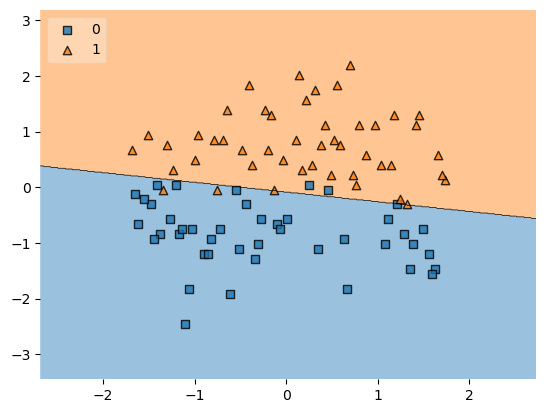

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf = clf , legend = 2)